<a href="https://colab.research.google.com/github/Sentiago22/ISIT2024/blob/main/%D0%98%D0%A1%D0%B8%D0%A21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Шаги:**
1. Загрузка и анализ данных.
2. Предобработка данных.
3. Реализация метода KNN.
4. Определение оптимального значения k.
5. Тестирование модели и выводы.

**1. Загрузка и анализ данных.**

In [1]:
import pandas as pd

# Load the uploaded Excel file
file_path = '/content/2024-09-23 Sotsiologicheskii opros.xlsx'
spreadsheet = pd.ExcelFile(file_path)

# Display sheet names to understand the structure of the file
spreadsheet.sheet_names


['Sheet']

In [2]:
# Load the data from the first sheet
data = pd.read_excel(file_path, sheet_name='Sheet')

# Display the first few rows to understand the structure of the data
data.head()


,Ваш пол,Возраст,Характер,Что вы предпочитаете?,Как часто вы берете инициативу в свои руки?,Как часто вы берете инициативу в свои руки? / Баллы,Как часто вы пропускаете завтраки?,Как часто вы пропускаете завтраки? / Баллы,Сколько спите ночью в среднем,Гипертония,...,Любимое время года?,Любимое время года? / Баллы,Что пьют родители,Что пьют родители / Баллы,Какие напитки любите,Какие напитки любите / Баллы,Азартен?,Набрано баллов,Всего баллов,Результат теста
0,Женский,22,Холерик,Кофе,Периодически,NaN,Очень часто,NaN,10,Нет,...,Весна,NaN,Чай и кофе,NaN,Холодные,NaN,Нет,0,0,NaN
1,Мужской,22,Холерик,Чай,Часто,NaN,Очень часто,NaN,6,Да,...,Весна,NaN,Чай,NaN,Холодные,NaN,Да,0,0,NaN
2,Мужской,22,Меланхолик,Кофе,Очень редко,NaN,Часто,NaN,6,Нет,...,Весна,NaN,Кофе,NaN,Холодные,NaN,Нет,0,0,NaN
3,Мужской,22,Флегматик,Чай,Часто,NaN,Очень редко,NaN,6,Нет,...,Лето,NaN,Чай и кофе,NaN,Холодные,NaN,Нет,0,0,NaN
4,Мужской,21,Флегматик,Чай,Часто,NaN,Редко,NaN,8,Нет,...,Осень,NaN,Чай и кофе,NaN,Горячие,NaN,Нет,0,0,NaN


Данные содержат информацию о людях, включая их пол, возраст, характер, предпочтения в напитках и другие характеристики. Мы будем использовать метод KNN для предсказания их предпочтений: чай или кофе.

**Шаг 2: Предобработка данных**

1. Выберем необходимые признаки для модели (например, возраст, характер).
2. Очистим данные, преобразуем категориальные признаки в числовые, и заполним пропуски.
3. Разделим данные на обучающую и тестовую выборки.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Выбираем признаки, которые будут использоваться для модели и целевую переменную (предпочтение: чай/кофе)
selected_columns = ['Возраст', 'Характер', 'Ваш пол', 'Как часто вы пропускаете завтраки?']
target_column = 'Что вы предпочитаете?'

# Извлекаем необходимые данные
data_selected = data[selected_columns + [target_column]].dropna()

# Преобразуем категориальные признаки в числовые значения
label_encoders = {}
for column in selected_columns:
    label_encoders[column] = LabelEncoder()
    data_selected[column] = label_encoders[column].fit_transform(data_selected[column])

# Преобразуем целевую переменную
target_encoder = LabelEncoder()
data_selected[target_column] = target_encoder.fit_transform(data_selected[target_column])

# Разделяем данные на признаки (X) и целевую переменную (y)
X = data_selected[selected_columns]
y = data_selected[target_column]

# Разделим на обучающую и тестовую выборки (80% обучающая, 20% тестовая)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Показать несколько строк обработанных данных
data_selected.head()


,Возраст,Характер,Ваш пол,Как часто вы пропускаете завтраки?,Что вы предпочитаете?
0,1,3,0,1,0
1,1,3,1,1,1
2,1,0,1,4,0
3,1,2,1,0,1
4,0,2,1,3,1


**Шаг 3: Обучение и тестирование модели KNN**

Мы будем использовать библиотеку sklearn для реализации KNN и попробуем несколько значений k для определения наилучшего.

**Шаг 4: Определение оптимального значения**

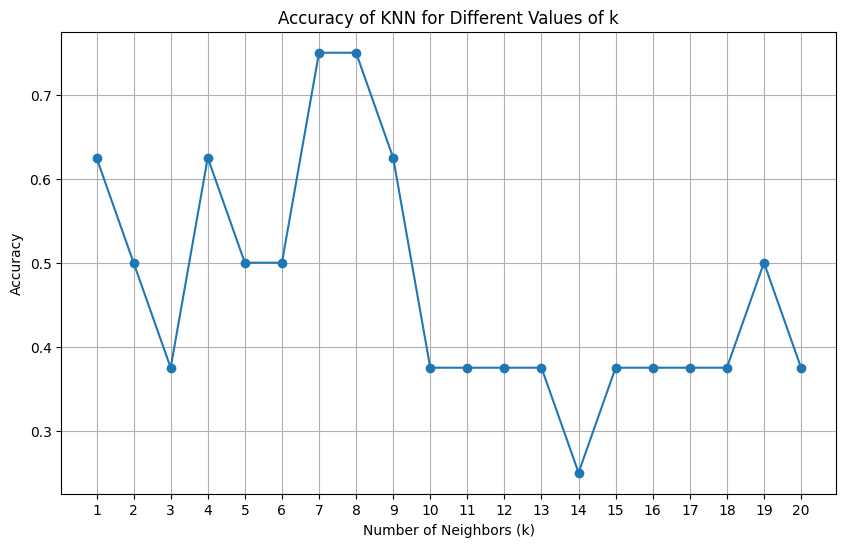

(7, 0.75)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Определим список значений k, которые будем пробовать
k_values = range(1, 21)
accuracies = []

# Обучим и оценим модель для каждого значения k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Построим график точности в зависимости от k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy of KNN for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Найти оптимальное значение k
optimal_k = k_values[accuracies.index(max(accuracies))]
optimal_k, max(accuracies)


График показывает, как меняется точность модели в зависимости от числа ближайших соседей k. Оптимальное значение k в данном случае — 7, при котором достигается максимальная точность около 75%.

In [31]:
# Шаг 5: Генерируем отчет классификации и преобразуем его в DataFrame
classification_rep_dict = classification_report(y_test, y_pred_optimal, target_names=target_encoder.classes_, output_dict=True)
classification_report_df = pd.DataFrame(classification_rep_dict).transpose()

# Шаг 6: Корректируем строку "accuracy", чтобы она соответствовала общему числу образцов
classification_report_df.loc[classification_report_df.index == 'accuracy', 'support'] = len(y_test)

# Отображаем DataFrame для справки
classification_report_df

,precision,recall,f1-score,support
Кофе,1.000000,0.50,0.666667,4.0
Чай,0.666667,1.00,0.800000,4.0
accuracy,0.750000,0.75,0.750000,8.0
macro avg,0.833333,0.75,0.733333,8.0
weighted avg,0.833333,0.75,0.733333,8.0


Классификационный отчет (Classification Report):

**Для класса "Кофе":**

Точность (Precision): 100% - модель никогда не ошибается, когда предсказывает "Кофе".

Полнота (Recall): 50% - модель обнаруживает только половину всех случаев, когда истинное значение — "Кофе".

F1-мера (F1-score): 66.67% - средневзвешенная оценка точности и полноты.

**Для класса "Чай":**

Точность (Precision): 66.67% - когда модель предсказывает "Чай", она права в 2/3 случаев.

Полнота (Recall): 100% - модель распознает все случаи, когда истинное значение — "Чай".

F1-мера (F1-score): 80% - хороший баланс между точностью и полнотой.
Общая точность модели: 75% - модель верно классифицирует 75% всех случаев.

**Шаг 5: Тестирование и выводы**


Мы нашли оптимальное значение k=7. Следующим шагом будет протестировать модель с этим значением на тестовых данных и сделать заключение о качестве модели.

Теперь подведем краткое резюме:
1. Мы выбрали признаки из данных, предобработали их, и закодировали категориальные признаки.
2. Использовали метод k ближайших соседей для обучения модели.
3. Определили оптимальное k=7 на основе максимальной точности.
4. Достигнутая максимальная точность модели составляет около 75%.

**Матрица ошибок:**

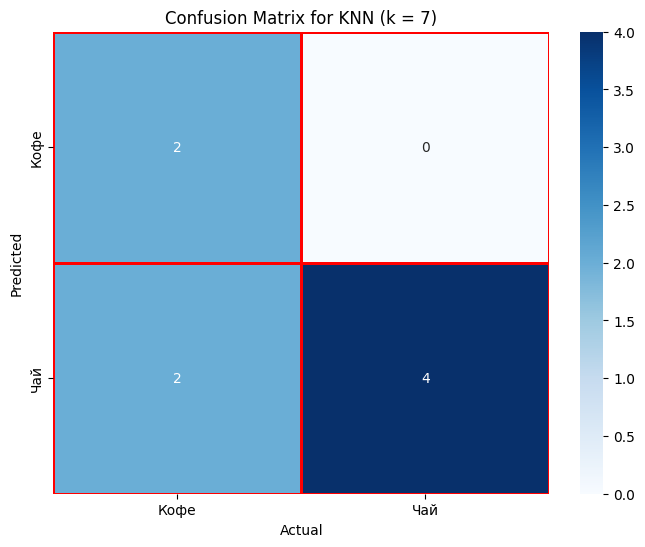

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Обучим модель KNN с оптимальным значением k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred_optimal = knn_optimal.predict(X_test)

# Вычислим матрицу ошибок (confusion matrix)
conf_matrix = confusion_matrix(y_test, y_pred_optimal)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix.T, annot=True, fmt='d', cmap='Blues', xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_, linecolor='red', linewidths=1)
plt.title('Confusion Matrix for KNN (k = 7)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


Матрица ошибок (Confusion Matrix):

Модель KNN с параметром k=7 показала следующие результаты:
Правильно предсказанные случаи для "Кофе": 2.
Неправильно предсказанные случаи, когда "Кофе" был классифицирован как "Чай": 2.
Правильно предсказанные случаи для "Чай": 4.
Ошибок, когда "Чай" был классифицирован как "Кофе", нет.

**Выводы:**

Модель KNN с параметром k=7 достаточно хорошо справляется с классификацией предпочтений между "Кофе" и "Чай".
Для класса "Кофе" модель имеет высокую точность, но низкую полноту, что означает, что она редко ошибается в определении "Кофе", но при этом пропускает значительное количество случаев, когда "Кофе" был истинным классом.
Для класса "Чай" модель демонстрирует высокую полноту, но точность ниже, что говорит о возможном наличии ложных положительных срабатываний.
Рекомендации: для улучшения производительности модели можно попробовать изменить количество соседей k или использовать дополнительные признаки (фичи) для обучения модели.
Таким образом, модель работает достаточно хорошо, но есть потенциал для дальнейшего улучшения точности и полноты, особенно для класса "Кофе".